In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("azcabgptca.csv")

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,died,procedure,age,gender,los,type
0,0,1,73,0,51,0
1,0,0,67,0,30,1
2,0,1,69,0,43,0
3,0,1,65,0,32,0
4,0,1,79,0,42,1


In [7]:
df.shape

(1959, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   died       1959 non-null   int64
 1   procedure  1959 non-null   int64
 2   age        1959 non-null   int64
 3   gender     1959 non-null   int64
 4   los        1959 non-null   int64
 5   type       1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


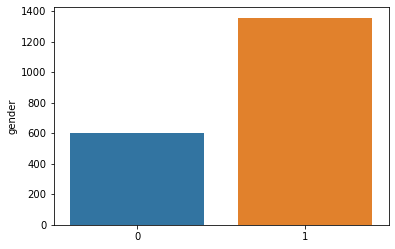

In [10]:
sns.barplot(x=df.gender.value_counts().index, y=df.gender.value_counts());

In [14]:
df.gender.value_counts(normalize=True)

1    0.6927
0    0.3073
Name: gender, dtype: float64

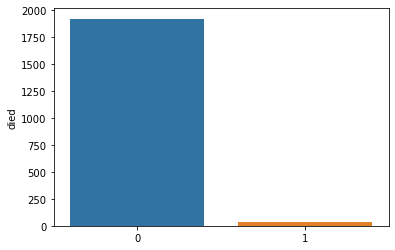

In [11]:
sns.barplot(x=df.died.value_counts().index, y=df.died.value_counts());

In [12]:
df.died.value_counts()

0    1923
1      36
Name: died, dtype: int64

In [13]:
df.died.value_counts(normalize=True)

0    0.981623
1    0.018377
Name: died, dtype: float64

In [15]:
df.type.value_counts(normalize=True)

0    0.543645
1    0.456355
Name: type, dtype: float64

In [16]:
df.type.value_counts()

0    1065
1     894
Name: type, dtype: int64

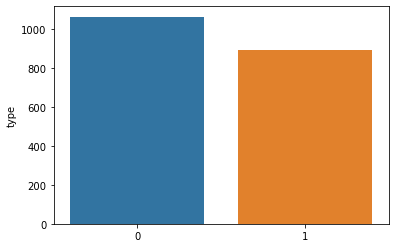

In [17]:
sns.barplot(x=df.type.value_counts().index, y=df.type.value_counts());

In [18]:
df.procedure.value_counts(normalize=True)

0    0.525778
1    0.474222
Name: procedure, dtype: float64

In [19]:
df.procedure.value_counts()

0    1030
1     929
Name: procedure, dtype: int64

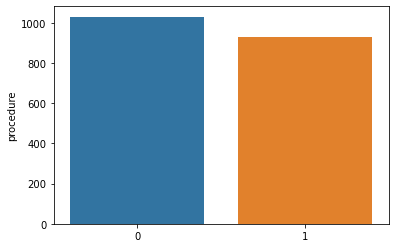

In [20]:
sns.barplot(x=df.procedure.value_counts().index, y=df.procedure.value_counts());

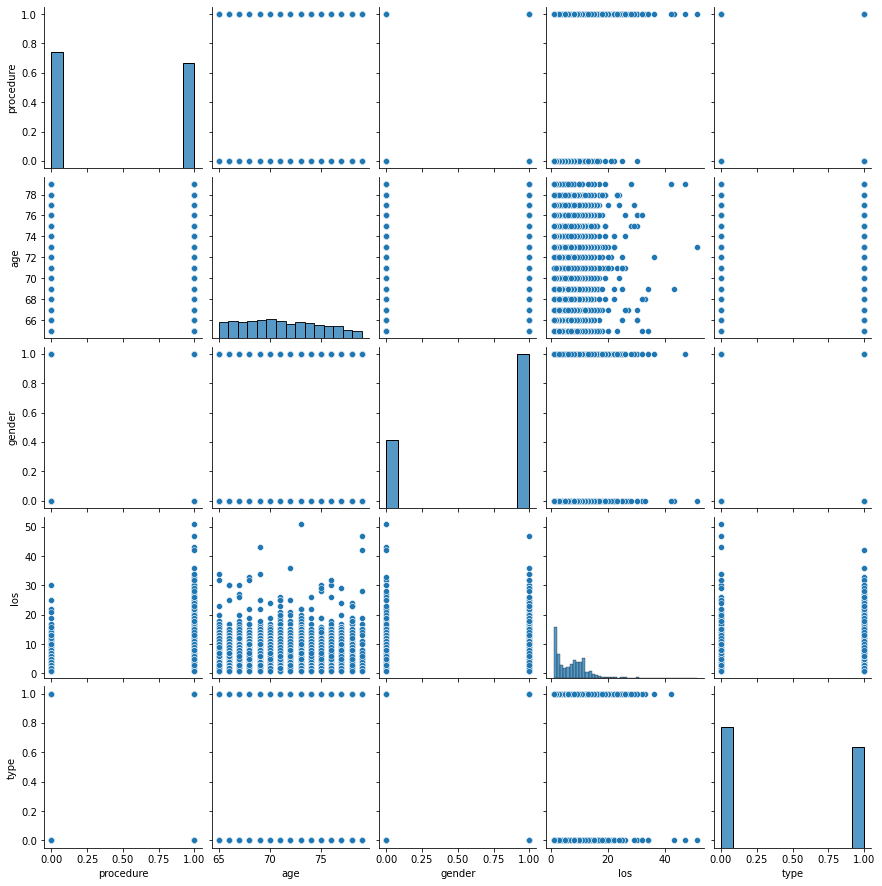

In [21]:
sns.pairplot(data=df.drop('died',axis=1));

In [22]:
X = df.drop('died',axis=1)
y = df.pop('died')

In [50]:
X.head()

,procedure,age,gender,los,type
0,1,73,0,51,0
1,0,67,0,30,1
2,1,69,0,43,0
3,1,65,0,32,0
4,1,79,0,42,1


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: died, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

In [52]:
rfcl = RandomForestClassifier(n_estimators = 500, random_state=0)
rfcl = rfcl.fit(X_train, y_train)

In [53]:
train_pred1 = rfcl.predict(X_train)
test_pred1 = rfcl.predict(X_test)

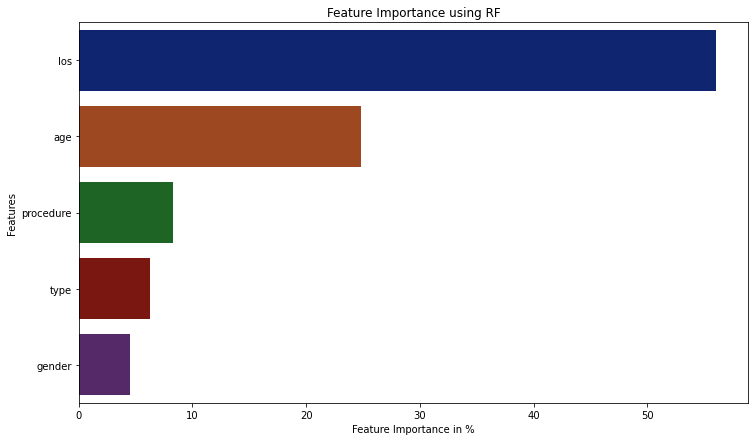

In [32]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [3, 4],
    'min_samples_leaf': [20, 30],
    'min_samples_split': [60, 90],
    'n_estimators': [101, 151]
}

rfcl2 = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl2, param_grid = param_grid, cv = 3)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [3, 4],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [60, 90],
                         'n_estimators': [101, 151]})

In [28]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 101}

In [29]:
best_grid = grid_search.best_estimator_

In [30]:
train_pred2 = best_grid.predict(X_train)
test_pred2 = best_grid.predict(X_test)

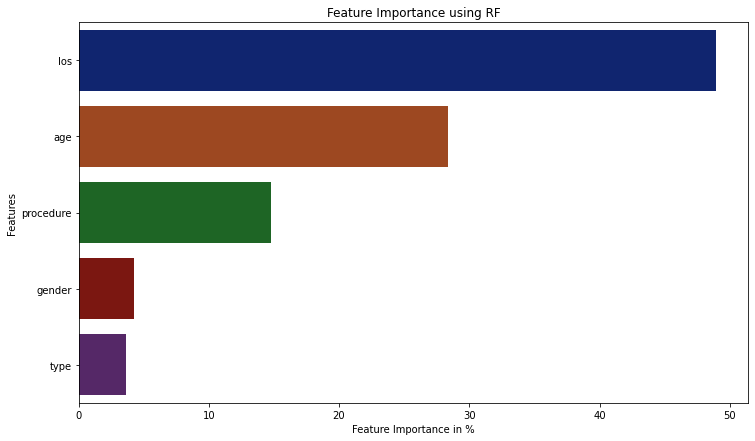

In [31]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_confusion_matrix, roc_auc_score

In [54]:
print(classification_report(y_train, train_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1346
           1       1.00      0.60      0.75        25

    accuracy                           0.99      1371
   macro avg       1.00      0.80      0.87      1371
weighted avg       0.99      0.99      0.99      1371



In [55]:
print(classification_report(y_test, test_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.71      0.45      0.56        11

    accuracy                           0.99       588
   macro avg       0.85      0.73      0.77       588
weighted avg       0.98      0.99      0.98       588



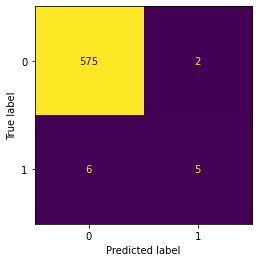

In [56]:
plot_confusion_matrix(estimator=rfcl, X=X_test, y_true=y_test,colorbar=False)

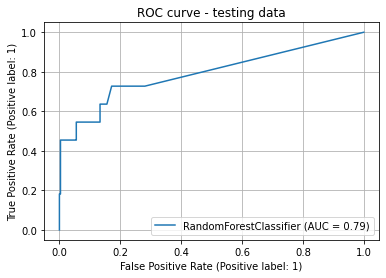

In [57]:
plot_roc_curve(estimator = rfcl, X=X_test, y=y_test)
plt.title('ROC curve - testing data')
plt.grid()

In [58]:
probs = rfcl.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.792


In [45]:
5/11

0.45454545454545453

In [46]:
confusion_matrix(y_test,test_pred1)

array([[575,   6],
       [  2,   5]], dtype=int64)

In [47]:
5/7

0.7142857142857143